<a href="https://colab.research.google.com/github/ChiriKamau/soma/blob/main/notebooks/soma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')


path = "/content/drive/MyDrive/Soma/Population_scounty_age_gender.csv"


import pandas as pd
df = pd.read_csv(path)

print(df.shape)
print(df.columns)
df.head(10)


Mounted at /content/drive
(48208, 6)
Index(['ewcounty', 'sub-county', 'Age', 'Male', 'Female', 'Total'], dtype='object')


,ewcounty,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351
5,BARINGO,ALL,4,11045,10276,21321
6,BARINGO,ALL,0 - 4,48508,46523,95031
7,BARINGO,ALL,5,10701,10047,20748
8,BARINGO,ALL,6,10949,10422,21371
9,BARINGO,ALL,7,9595,9082,18677


In [7]:

df_clean = df[df["Age"].astype(str).str.isdigit() | (df["Age"] == "Total")]

df_clean = df_clean.reset_index(drop=True)


print("Original :", len(df))
print("Filtered:", len(df_clean))
df_clean.head(20)


Original : 48208
Filtered: 39586


,ewcounty,sub-county,Age,Male,Female,Total
0,BARINGO,ALL,Total,336322,330428,666750
1,BARINGO,ALL,0,8303,7982,16285
2,BARINGO,ALL,1,8669,8417,17086
3,BARINGO,ALL,2,10226,9762,19988
4,BARINGO,ALL,3,10265,10086,20351
5,BARINGO,ALL,4,11045,10276,21321
6,BARINGO,ALL,5,10701,10047,20748
7,BARINGO,ALL,6,10949,10422,21371
8,BARINGO,ALL,7,9595,9082,18677
9,BARINGO,ALL,8,10276,10027,20303


In [1]:
!pip install geopandas matplotlib

import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/json/gadm41_KEN_2.json"
kenya_sub = gpd.read_file(url)
kenya_sub.head()


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,KEN.1.1_1,KEN,Kenya,KEN.1_1,Baringo,NA,805,NA,NA,Constituency,Constituency,162,NA,"MULTIPOLYGON (((35.8773 -0.0297, 35.8721 -0.02..."
1,KEN.1.2_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoCentral,NA,NA,Constituency,Constituency,159,NA,"MULTIPOLYGON (((35.7977 0.3395, 35.7975 0.3322..."
2,KEN.1.3_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoNorth,NA,NA,Constituency,Constituency,158,NA,"MULTIPOLYGON (((35.8135 0.6028, 35.8112 0.5971..."
3,KEN.1.4_1,KEN,Kenya,KEN.1_1,Baringo,NA,BaringoSouth,NA,NA,Constituency,Constituency,160,NA,"MULTIPOLYGON (((36.2293 0.4229, 36.2274 0.4026..."
4,KEN.1.5_1,KEN,Kenya,KEN.1_1,Baringo,NA,EldamaRavine,NA,NA,Constituency,Constituency,162,NA,"MULTIPOLYGON (((35.8234 0.0244, 35.834 0.0255,..."


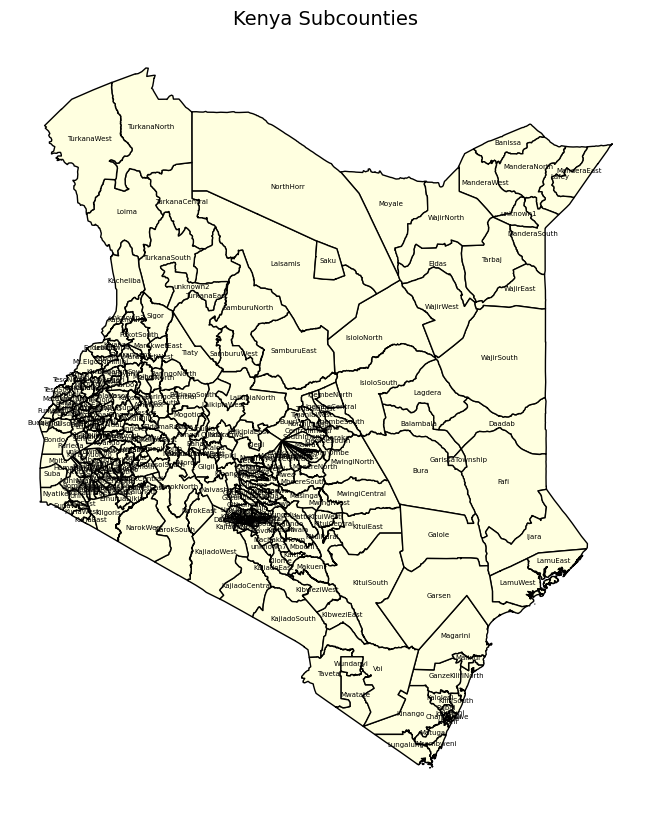

In [3]:
fig, ax = plt.subplots(figsize=(10,10))
kenya_sub.plot(ax=ax, color="lightyellow", edgecolor="black")

# Label each subcounty at its centroid
for idx, row in kenya_sub.iterrows():
    plt.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        fontsize=5, ha="center"
    )

plt.title("Kenya Subcounties", fontsize=14)
plt.axis("off")
plt.show()


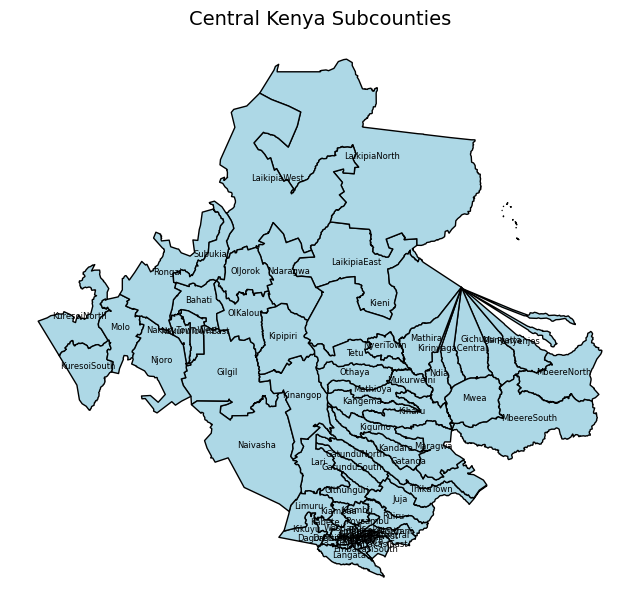

In [5]:
central_counties = ["Nyeri", "Kirinyaga", "Murang'a", "Kiambu", "Nyandarua", "Embu", "Laikipia","Nakuru","Nairobi"]

central_sub = kenya_sub[kenya_sub["NAME_1"].isin(central_counties)]

fig, ax = plt.subplots(figsize=(8,8))
central_sub.plot(ax=ax, color="lightblue", edgecolor="black")

for idx, row in central_sub.iterrows():
    plt.annotate(
        text=row["NAME_2"],
        xy=(row.geometry.centroid.x, row.geometry.centroid.y),
        fontsize=6, ha="center"
    )

plt.title("Central Kenya Subcounties", fontsize=14)
plt.axis("off")
plt.show()


In [21]:
# Subcounty totals only
pop_sub = df_clean[df_clean["Age"] == "Total"].copy()

# Standardize name for merging
pop_sub["sub_county"] = pop_sub["sub-county"].str.strip().str.lower()


In [22]:
kenya_sub["sub_county"] = kenya_sub["NAME_2"].str.strip().str.lower()


In [23]:
merged = kenya_sub.merge(pop_sub, on="sub_county", how="left")

print("Total subcounties in shapefile:", kenya_sub.shape[0])
print("Matched with data:", merged["Total"].notna().sum())

# Check if any missing matches
missing = merged[merged["Total"].isna()]["sub_county"].unique()
print("Unmatched subcounties:", missing[:20])  # show first 20


Total subcounties in shapefile: 300
Matched with data: 114
Unmatched subcounties: ['805' 'baringocentral' 'baringonorth' 'baringosouth' 'eldamaravine'
 'tiaty' 'bometcentral' 'bometeast' 'kabuchai' 'kanduyi' 'mt.elgon'
 'sirisia' 'webutewest' 'webuyeeast' 'budalangi' 'funyula' 'matayos'
 'tesonorth' 'tesosouth' 'keiyonorth']


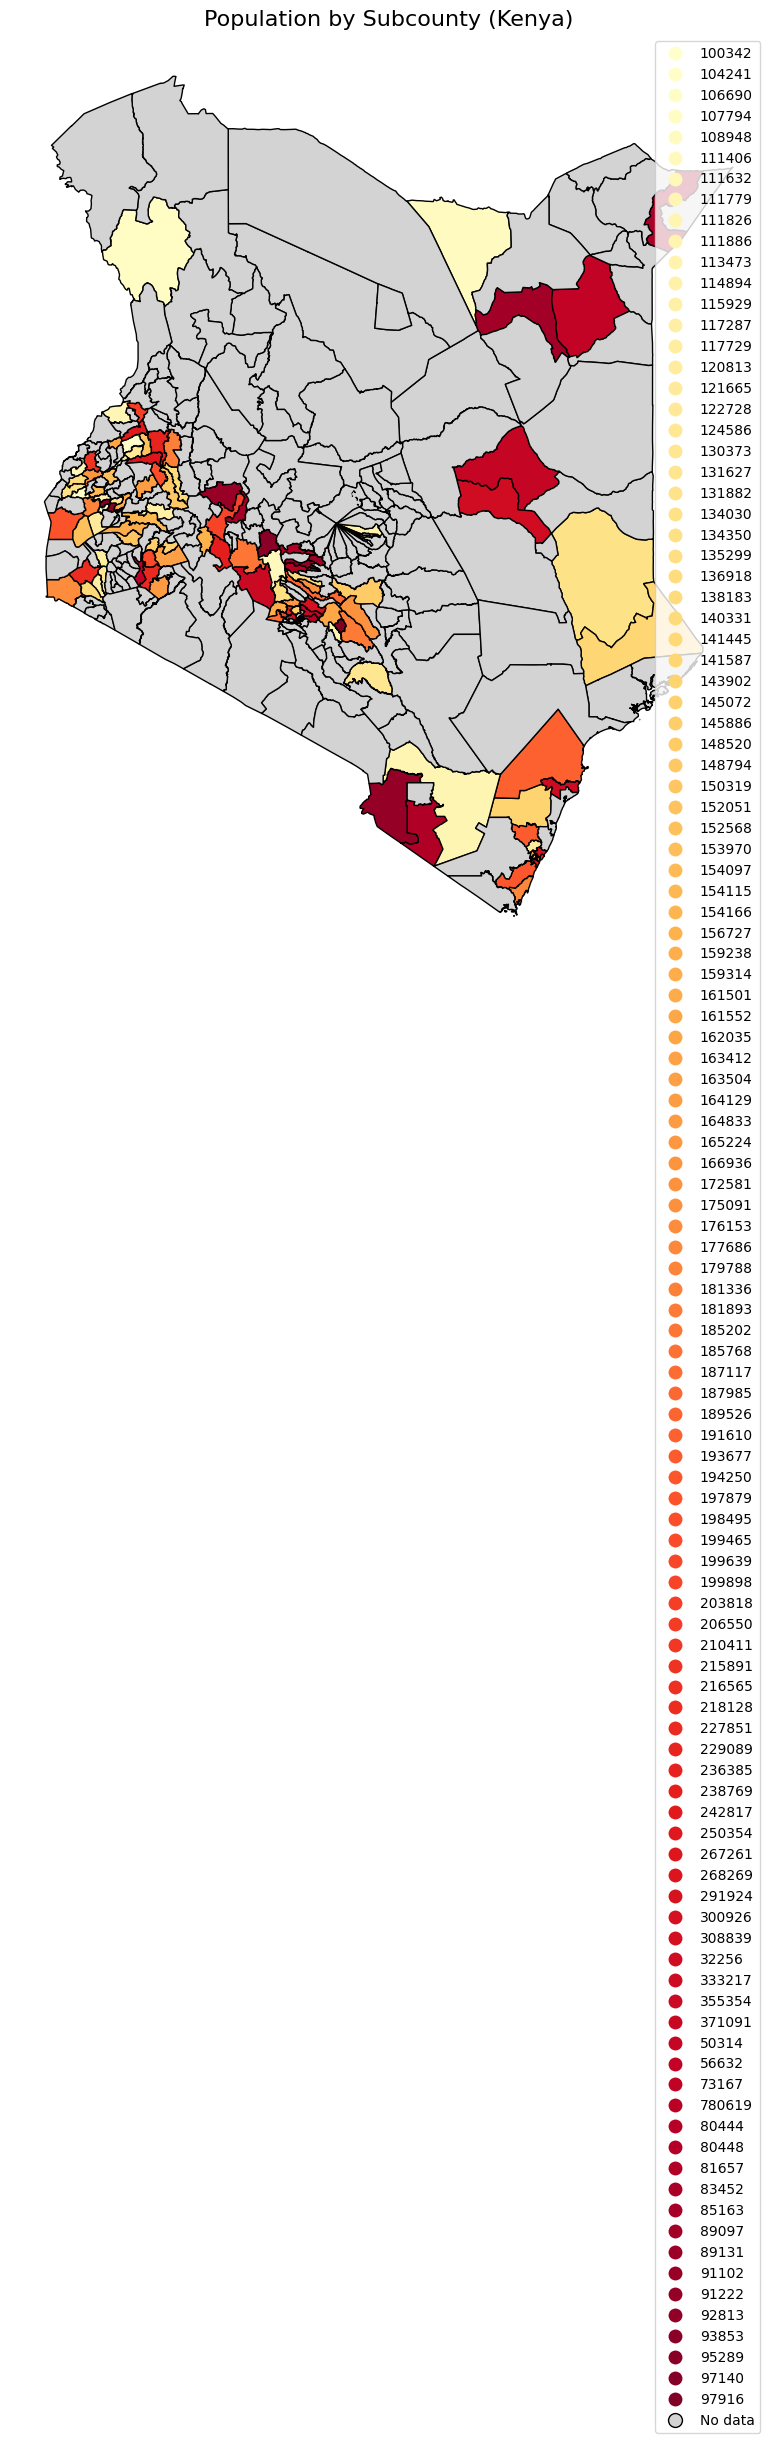

In [25]:
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(
    column="Total",
    cmap="YlOrRd",
    legend=True,
    ax=ax,
    edgecolor="black",
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Population by Subcounty (Kenya)", fontsize=16)
plt.axis("off")
plt.show()
